K-Nearest Neighbors Accuracy: 0.97
Support Vector Machine Accuracy: 0.97
Random Forest Accuracy: 0.97
Logistic Regression Accuracy: 0.97

Best Classifier: K-Nearest Neighbors with Accuracy: 0.97


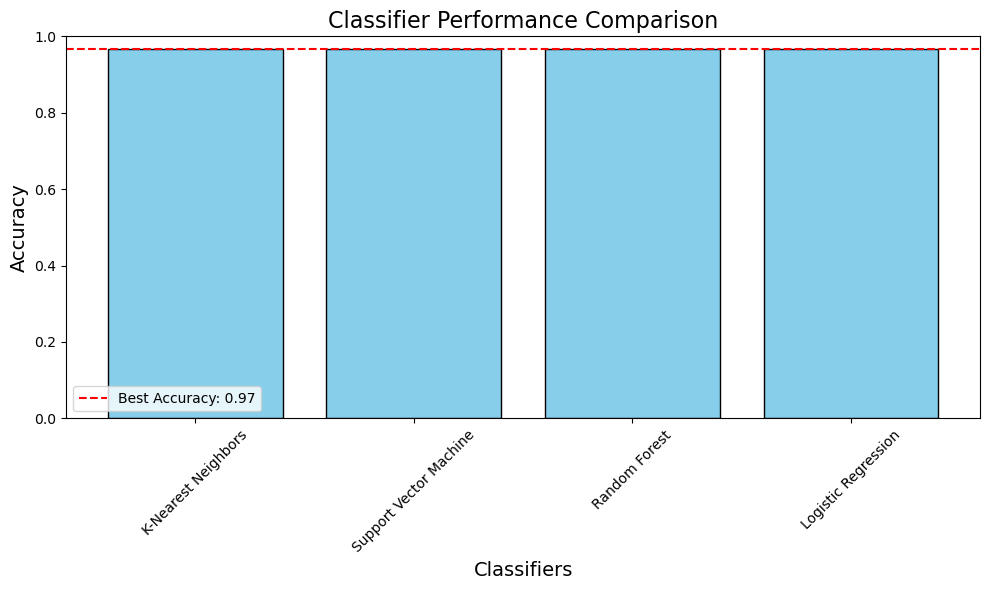

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# Load the MFCC features and labels
mfcc_features = np.load(r'C:\Users\Jorda\Desktop\ECE 4830 Drone Detection SDP\code\dataset\mfcc_features.npy')
labels = np.load(r'C:\Users\Jorda\Desktop\ECE 4830 Drone Detection SDP\code\dataset\labels.npy')

# Encode string labels into numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mfcc_features, encoded_labels, test_size=0.25, random_state=42)

# Scale the data for models that benefit from scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights for Logistic Regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Define classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(class_weight=dict(enumerate(class_weights)), max_iter=500)
}

# Evaluate each classifier
accuracies = []
classifier_names = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the classifier
    y_pred = clf.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    accuracies.append(accuracy)
    classifier_names.append(name)
    print(f"{name} Accuracy: {accuracy:.2f}")

# Identify the best classifier
best_index = np.argmax(accuracies)
best_classifier = classifier_names[best_index]
best_accuracy = accuracies[best_index]

print(f"\nBest Classifier: {best_classifier} with Accuracy: {best_accuracy:.2f}")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Classifier Performance Comparison', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f'Best Accuracy: {best_accuracy:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

